## Answering all the descriptive questions

In [ ]:
#Importing the reqired libraries
import pandas as pd
import numpy as np


# List of filenames
datafiles = ['N:\DATA FILES\HTNDM_202301Q.csv', 'N:\DATA FILES\HTNDM_202302Q.csv', 'N:\DATA FILES\HTNDM_202303Q.csv', 'N:\DATA FILES\HTNDM_202304Q.csv', 'N:\DATA FILES\HTNDM_202305Q.csv', 'N:\DATA FILES\HTNDM_202306Q.csv', 'N:\DATA FILES\HTNDM_202307Q.csv', 'N:\DATA FILES\HTNDM_202308Q.csv', 'N:\DATA FILES\HTNDM_202309Q.csv', 'N:\DATA FILES\HTNDM_202310Q.csv','N:\DATA FILES\HTNDM_202311Q.csv', 'N:\DATA FILES\HTNDM_202312Q.csv', 'N:\DATA FILES\HTNDM_202401Q.csv', 'N:\DATA FILES\HTNDM_202402Q.csv', 'N:\DATA FILES\HTNDM_202403Q.csv', 'N:\DATA FILES\HTNDM_202404Q.csv', 'N:\DATA FILES\HTNDM_202405Q.csv']

datafiles

In [ ]:
## Fixixng the number of Columns. (In the output, the number of columns were 54, but it should be 52, that means we have two extra columns, so we are fixing it here )

# Inspect columns of each file
for file in datafiles:
    df = pd.read_csv(file, low_memory=False)
    print(f"{file} columns: {df.columns.tolist()}")

# Define the correct column names
correct_columns = ["mbi_id_orig", "DOS","ACCESSION_NUMBER", "REQUISITION_NUMBER", "LAB_CODE","DATE_OF_COLLECTION", "EXTERNAL_PAT_ID", "PAT_STATE", "PAT_ZIP", "DATE_OF_BIRTH", "AGE", "GENDER", "BILL_CODE", 
                   "POLICY_NUMBER", "MEDICAID_NO", "MEDICARE_NO", "PHY_NAME", "UPIN", "DIAG_CODE1", "DIAG_CODE2", "DIAG_CODE3", "DIAG_CODE4", "DIAG_CODE5", "DIAG_CODE6", "DIAG_CODE7", "DIAG_CODE8", "DIAG_CODE9", "DIAG_CODE10", 
                   "LOCAL_PROFILE_CODE", "STANDARD_PROFILE_CODE", "PROFILE_NAME", "LOCAL_ORDER_CODE", "STANDARD_ORDER_CODE", "ORDER_NAME", "LOINC_CODE", "LOCAL_RESULT_CODE", "RESULT_NAME", "RESULT_VALUE_A", 
                   "UNITS", "REF_RANGE_LOW", "REF_RANGE_HIGH", "REF_RANGE_ALPHA", "DERIVED_ABNORMAL_FLAG", "CPT_CODE", "COMM_TEXT", "ORDERING_SITE_CODE", "Elig_Member_Id", "npi", "unique_linker", "DM", "HTN", "DM_HTN"]  



# Function to standardize columns
def standardize_columns(df, correct_columns):
    # Rename columns to match the correct ones
    df.columns = [col.strip() for col in df.columns]
    # Reindex DataFrame to have missing columns filled with NaN and extra columns dropped
    return df.reindex(columns=correct_columns)

In [ ]:
# Read, standardize, and concatenate all files
dfs = []
for file in datafiles:
    df = pd.read_csv(file, low_memory=False)
    df = standardize_columns(df, correct_columns)
    dfs.append(df)

# Concatenate all DataFrames
final_df = pd.concat(dfs, ignore_index=True)

final_df

In [ ]:
#Keeping only the required column, and setting the columns as copy.

df1 = final_df[['mbi_id_orig', 'DOS','RESULT_NAME', 'RESULT_VALUE_A', 'CPT_CODE', 'LOINC_CODE', 'ORDER_NAME','DM', 'HTN', 'DM_HTN']].copy()

In [ ]:
#Saving the dataframe to a csv file.
df1.to_csv('Final_data.csv', index=False)

In [ ]:
#Reading the Final_data.csv as dataframe
df = pd.read_csv("Final_data.csv")

In [303]:
df

,mbi_id_orig,DOS,RESULT_NAME,RESULT_VALUE_A,CPT_CODE,LOINC_CODE,ORDER_NAME,DM,HTN,DM_HTN
0,1A02AU0GA19,20230118,CALCIUM,9.4,82310,17861-6,CALCIUM,0,1,NaN
1,1A02AU0GA19,20230118,TSH,0.03,84443,3016-3,TSH,0,1,NaN
2,1A17KC1AE43,20230107,"PARATHYROID HORMONE, INTACT",50,83970,2731-8,"PTH, INTACT WITHOUT CALCIUM",1,1,1.0
3,1A21Y74TH17,20221231,SARS CoV 2 RNA,NOT DETECTED,U0003,94500-6,"SARS CoV 2 RNA(COVID 19), QUALITATIVE NAAT",0,1,NaN
4,1A24KC7UX79,20230120,"CHOLESTEROL, TOTAL",153,80061,2093-3,"CHOLESTEROL, TOTAL",1,0,NaN
...,...,...,...,...,...,...,...,...,...,...
3200958,9YX7F06WQ39,20240522,MONOCYTES,7.7,85025,5905-5,CBC (INCLUDES DIFF/PLT),1,0,NaN
3200959,9YX7F06WQ39,20240522,EOSINOPHILS,1.8,85025,713-8,CBC (INCLUDES DIFF/PLT),1,0,NaN
3200960,9YX7F06WQ39,20240522,BASOPHILS,0.7,85025,706-2,CBC (INCLUDES DIFF/PLT),1,0,NaN
3200961,9YX7F06WQ39,20240522,HEMOGLOBIN A1c,9.3,83036,4548-4,HEMOGLOBIN A1c,1,0,NaN


In [304]:
#Changing the date format
df.loc[:, 'DOS'] = pd.to_datetime(df['DOS'], format='%Y%m%d')

C:\Users\nsharma\AppData\Local\Temp\ipykernel_21692\899893931.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2023-01-18 00:00:00', '2023-01-18 00:00:00', '2023-01-07 00:00:00',
 '2022-12-31 00:00:00', '2023-01-20 00:00:00', '2023-01-20 00:00:00',
 '2023-01-20 00:00:00', '2023-01-20 00:00:00', '2023-01-20 00:00:00',
 '2023-01-20 00:00:00',
 ...
 '2024-05-22 00:00:00', '2024-05-22 00:00:00', '2024-05-22 00:00:00',
 '2024-05-22 00:00:00', '2024-05-22 00:00:00', '2024-05-22 00:00:00',
 '2024-05-22 00:00:00', '2024-05-22 00:00:00', '2024-05-22 00:00:00',
 '2024-05-22 00:00:00']
Length: 3200963, dtype: datetime64[ns]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'DOS'] = pd.to_datetime(df['DOS'], format='%Y%m%d')


In [305]:
#Replacing all the blank rows of DM_HTN with 0
df['DM_HTN'] = df['DM_HTN'].fillna(0)

In [306]:
df

,mbi_id_orig,DOS,RESULT_NAME,RESULT_VALUE_A,CPT_CODE,LOINC_CODE,ORDER_NAME,DM,HTN,DM_HTN
0,1A02AU0GA19,2023-01-18,CALCIUM,9.4,82310,17861-6,CALCIUM,0,1,0.0
1,1A02AU0GA19,2023-01-18,TSH,0.03,84443,3016-3,TSH,0,1,0.0
2,1A17KC1AE43,2023-01-07,"PARATHYROID HORMONE, INTACT",50,83970,2731-8,"PTH, INTACT WITHOUT CALCIUM",1,1,1.0
3,1A21Y74TH17,2022-12-31,SARS CoV 2 RNA,NOT DETECTED,U0003,94500-6,"SARS CoV 2 RNA(COVID 19), QUALITATIVE NAAT",0,1,0.0
4,1A24KC7UX79,2023-01-20,"CHOLESTEROL, TOTAL",153,80061,2093-3,"CHOLESTEROL, TOTAL",1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
3200958,9YX7F06WQ39,2024-05-22,MONOCYTES,7.7,85025,5905-5,CBC (INCLUDES DIFF/PLT),1,0,0.0
3200959,9YX7F06WQ39,2024-05-22,EOSINOPHILS,1.8,85025,713-8,CBC (INCLUDES DIFF/PLT),1,0,0.0
3200960,9YX7F06WQ39,2024-05-22,BASOPHILS,0.7,85025,706-2,CBC (INCLUDES DIFF/PLT),1,0,0.0
3200961,9YX7F06WQ39,2024-05-22,HEMOGLOBIN A1c,9.3,83036,4548-4,HEMOGLOBIN A1c,1,0,0.0


In [ ]:
#Total data = 54775 
#2022-2024

In [311]:
# a) For the unique patients with “DM=1” [diabetes] and/or HTN=1 [hypertension] create an overall summary of the frequency of the types of tests performed. 

# Step 1: Filter data for patients with Diabetes=1 and/or Hypertension=1
filtered_df = df[(df['DM'] == 1) | (df['HTN'] == 1)]

# step 2. Create a value of Order Name – Result Name
filtered_df['Test_Type'] = filtered_df['ORDER_NAME'] + ' - ' + filtered_df['RESULT_NAME']

# Step 3: Identify unique patients
unique_patients_df = filtered_df.drop_duplicates(subset=['mbi_id_orig'])


# Step 3: Aggregate the frequency of test types
test_type_summary = unique_patients_df['Test_Type'].value_counts()

test_type_summary.columns= ['Test_Type', 'Frequency']


test_type_summary.name = 'Frequency'
test_type_summary = test_type_summary.reset_index()
test_type_summary.columns = ['Test_Type', 'Frequency']


# Calculate percentages
test_type_summary['Percent_of_Frequency'] = test_type_summary['Frequency'] / test_type_summary['Frequency'].sum() * 100

# Round the Percent_of_Frequency to 2 decimal places
test_type_summary['Percent_of_Frequency'] = test_type_summary['Percent_of_Frequency'].round(2)


test_type_summary

,Test_Type,Frequency,Percent_of_Frequency
0,"CHOLESTEROL, TOTAL - CHOLESTEROL, TOTAL",19133,34.95
1,COMPREHENSIVE METABOLIC PANEL - GLUCOSE,3944,7.20
2,HEMOGLOBIN A1c - HEMOGLOBIN A1c,2399,4.38
3,"CULTURE, URINE, ROUTINE - STATUS:",1876,3.43
4,BASIC METABOLIC PANEL - GLUCOSE,1683,3.07
...,...,...,...
1627,11-DEOXYCORTISOL - 11-DEOXYCORTISOL,1,0.00
1628,"NICOTINE AND COTININE, SERUM/PLASMA - NICOTINE...",1,0.00
1629,HMGCR AB (IGG) - HMGCR AB (IGG),1,0.00
1630,"GLUCOSE, RANDOM - GLUCOSE, RANDOM",1,0.00


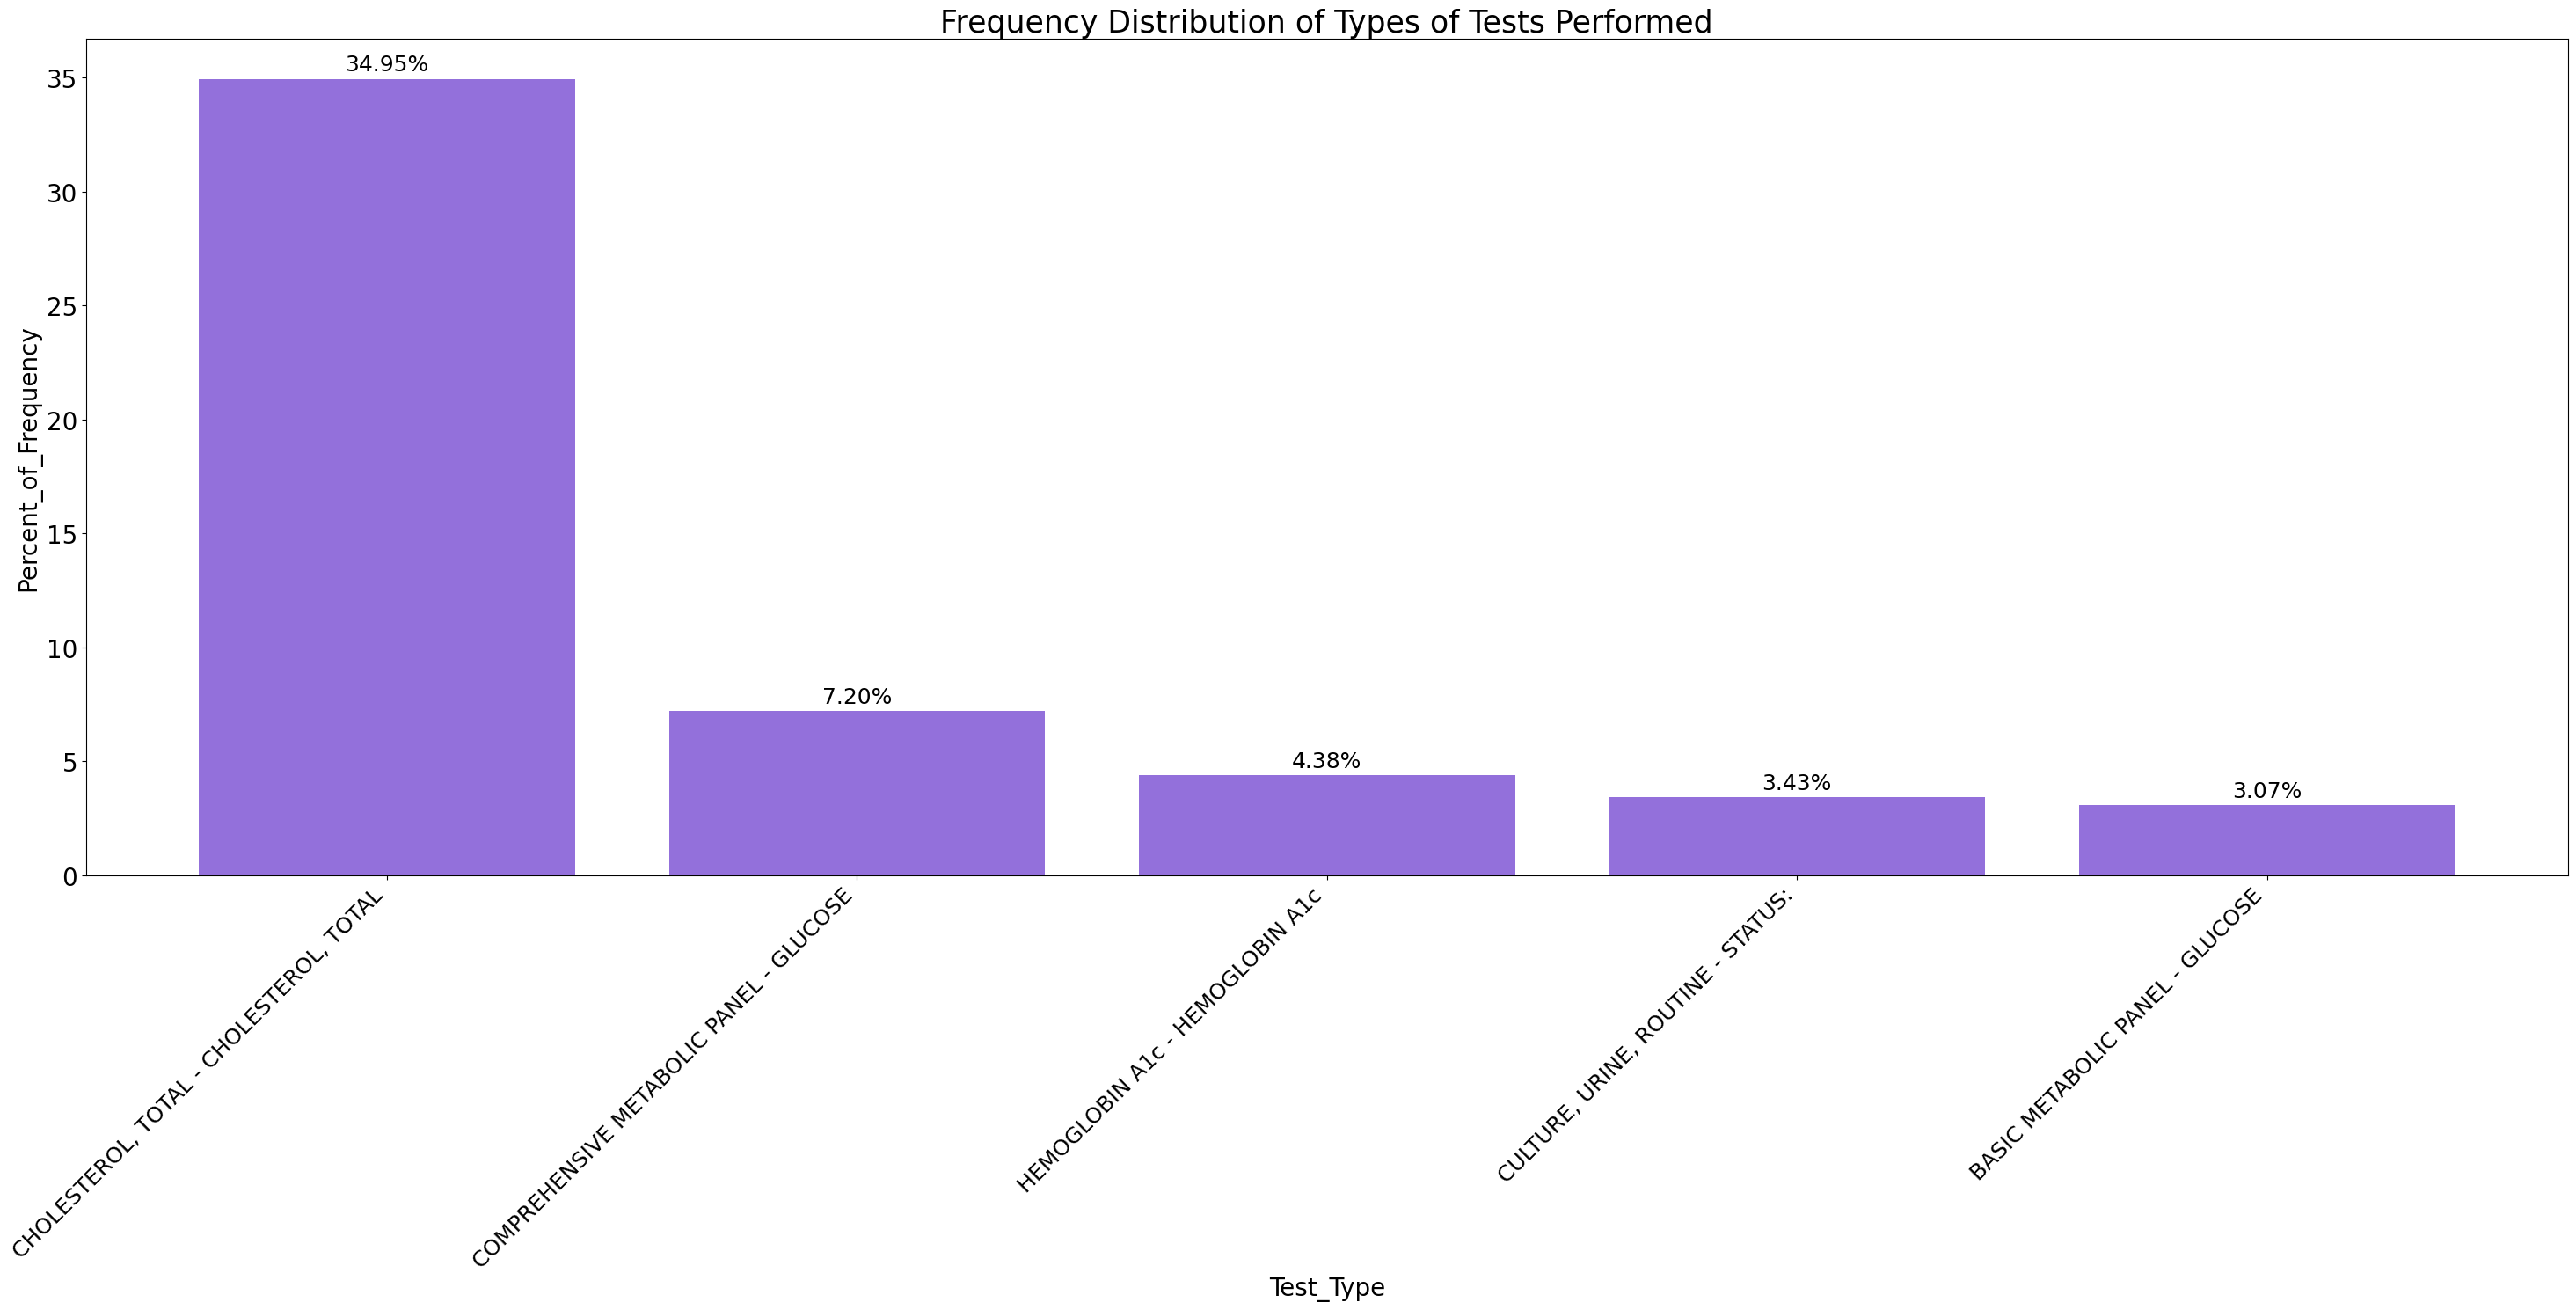

In [312]:
#Creating the graph for the above results
import matplotlib.pyplot as plt

# Create a DataFrame from the test_counts
summary_df = test_type_summary[['Test_Type','Percent_of_Frequency']].reset_index()
top_5_summary = summary_df.nlargest(5, 'Percent_of_Frequency')

# Plot the frequency distribution as a bar chart
plt.figure(figsize=(30, 15))

bars = plt.bar(top_5_summary['Test_Type'], top_5_summary['Percent_of_Frequency'], color='mediumpurple')


# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.annotate(f'{yval:.2f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, yval),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=18)

plt.xlabel('Test_Type', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.ylabel('Percent_of_Frequency', fontsize=20)
plt.yticks(fontsize=20)
plt.title('Frequency Distribution of Types of Tests Performed', fontsize=25)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

In [328]:
#38815 total data
#2022-2024

In [ ]:
# b) For the patients with a DM=1; how many received HbA1c Tests that had a value below 9.0, at or above 9.0, or result was not presented

# Step 1: Filter data for patients with Diabetes=1
diabetes_df = df[df['DM'] == 1]

# Step 2: Further filter to include only HbA1c tests
test_names = ['HbA1c', 'HEMOGLOBIN A1c']
hba1c_tests_df = diabetes_df[diabetes_df['RESULT_NAME'].isin(test_names)]


#Converting the RESULT_VALUE_A column into numeric
hba1c_tests_df['RESULT_VALUE_A'] = pd.to_numeric(hba1c_tests_df['RESULT_VALUE_A'], errors='coerce')

#Categorizing the HbA1c values
below_9 = hba1c_tests_df[hba1c_tests_df['RESULT_VALUE_A'] < 9.0].shape[0]
at_or_above_9 = hba1c_tests_df[hba1c_tests_df['RESULT_VALUE_A'] >= 9.0].shape[0]
total_patients = hba1c_tests_df.shape[0]
# not_presented = hba1c_tests_df[hba1c_tests_df['RESULT_VALUE_A'].isna()].shape[0]

# Calculate percentages
percent_below_9 = round((below_9 / total_patients) * 100, 2)
percent_at_or_above_9 = round((at_or_above_9 / total_patients) * 100, 2)

# Print results
print(f"Patients with HbA1c < 9.0: {percent_below_9}")
print(f"Patients with HbA1c >= 9.0: {percent_at_or_above_9}")

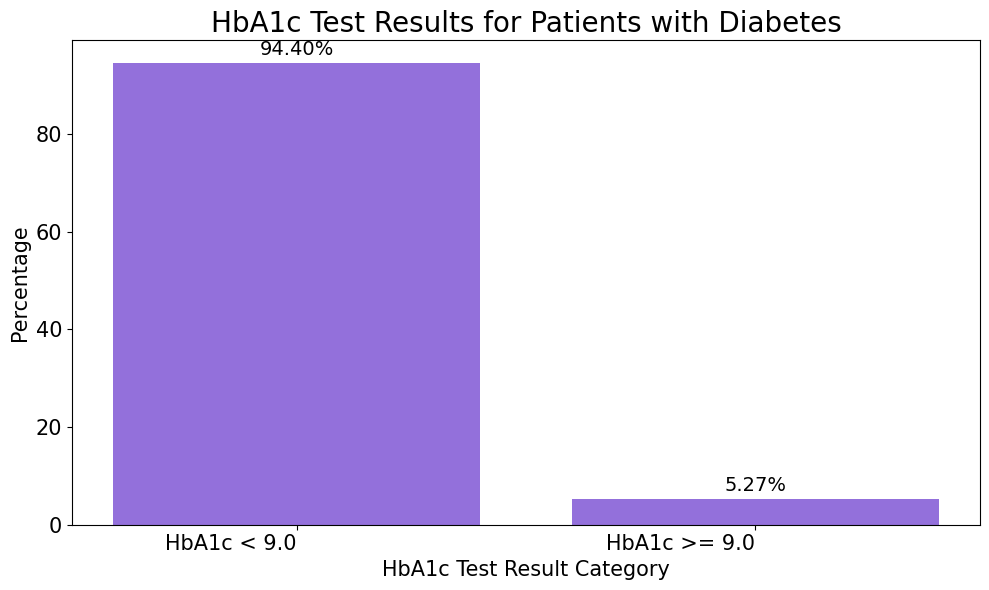

In [191]:
# #Creating the graph for the above results

categories = ['HbA1c < 9.0', 'HbA1c >= 9.0']
counts = [percent_below_9, percent_at_or_above_9]


plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color='mediumpurple')

# # Add labels on top of each bar
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom', fontsize=14)
for bar in bars:
    yval = bar.get_height()
    plt.annotate(f'{yval:.2f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, yval),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=14)

plt.bar(categories, counts, color='mediumpurple')
plt.xlabel('HbA1c Test Result Category', fontsize=15)
plt.xticks(ha='right', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.yticks(fontsize=15)
plt.title('HbA1c Test Results for Patients with Diabetes', fontsize=20)
plt.tight_layout()
plt.show()

In [216]:
# c) For patients with a DM=1, HTN=1, what were the common tests that were performed?  Frequency distribution from highest volume to lowest volume. 

# Step 1: Filter data for patients with Diabetes=1 and Hypertension=1
filtered_df = df[(df['DM'] == 1) & (df['HTN'] == 1)]

# step 2. Create a value of Order Name – Result Name
filtered_df['Test_Type'] = filtered_df['ORDER_NAME'] + ' - ' + filtered_df['RESULT_NAME']


# Step 3: Count the frequency of each test type
test_type_counts = filtered_df['Test_Type'].value_counts().reset_index()
test_type_counts.columns = ['Test_Type', 'Common_Test_Frequency']

# Step 4: Sort by frequency from highest to lowest volume
test_type_counts = test_type_counts.sort_values(by='Common_Test_Frequency', ascending=False)

# Step 5: Calculate percentages
total_tests = test_type_counts['Common_Test_Frequency'].sum()
test_type_counts['Percent_of_Frequency'] = (test_type_counts['Common_Test_Frequency'] / total_tests) * 100

# Step 6: Round the Percent_of_Frequency to 2 decimal places
test_type_counts['Percent_of_Frequency'] = test_type_counts['Percent_of_Frequency'].round(2)

test_type_counts

C:\Users\nsharma\AppData\Local\Temp\ipykernel_21692\1424738294.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Test_Type'] = filtered_df['ORDER_NAME'] + ' - ' + filtered_df['RESULT_NAME']


,Test_Type,Common_Test_Frequency,Percent_of_Frequency
0,COMPREHENSIVE METABOLIC PANEL - ALKALINE PHOSP...,11143,1.94
2,COMPREHENSIVE METABOLIC PANEL - CALCIUM,11143,1.94
3,COMPREHENSIVE METABOLIC PANEL - SODIUM,11143,1.94
4,COMPREHENSIVE METABOLIC PANEL - CREATININE,11143,1.94
1,COMPREHENSIVE METABOLIC PANEL - ALBUMIN,11143,1.94
...,...,...,...
2263,FUNGAL ALLERGY PANEL - CLADOSPORIUM HERBARUM (...,1,0.00
2264,ADD ON COMPREHENSIVE METABOLIC PANEL - UREA NI...,1,0.00
2265,StoneRisk(R) Diagnostic Profile - PH URINE,1,0.00
2266,"VMA, 24-HOUR URINE W/CREAT - CREATININE, URINE",1,0.00


## Additional Questions

In [ ]:
#Importing the reqired libraries
import pandas as pd
import numpy as np


# List of filenames
datafiles = ['N:\DATA FILES\HTNDM_202301Q.csv', 'N:\DATA FILES\HTNDM_202302Q.csv', 'N:\DATA FILES\HTNDM_202303Q.csv', 'N:\DATA FILES\HTNDM_202304Q.csv', 'N:\DATA FILES\HTNDM_202305Q.csv', 'N:\DATA FILES\HTNDM_202306Q.csv', 'N:\DATA FILES\HTNDM_202307Q.csv', 'N:\DATA FILES\HTNDM_202308Q.csv', 'N:\DATA FILES\HTNDM_202309Q.csv', 'N:\DATA FILES\HTNDM_202310Q.csv','N:\DATA FILES\HTNDM_202311Q.csv', 'N:\DATA FILES\HTNDM_202312Q.csv', 'N:\DATA FILES\HTNDM_202401Q.csv', 'N:\DATA FILES\HTNDM_202402Q.csv', 'N:\DATA FILES\HTNDM_202403Q.csv', 'N:\DATA FILES\HTNDM_202404Q.csv', 'N:\DATA FILES\HTNDM_202405Q.csv']

datafiles

In [ ]:
## Fixixng the number of Columns. (In the output, the number of columns were 54, but it should be 52, that means we have two extra columns, so we are fixing it here )

# Inspect columns of each file
for file in datafiles:
    df = pd.read_csv(file, low_memory=False)
    print(f"{file} columns: {df.columns.tolist()}")

# Define the correct column names
correct_columns = ["mbi_id_orig", "DOS","ACCESSION_NUMBER", "REQUISITION_NUMBER", "LAB_CODE","DATE_OF_COLLECTION", "EXTERNAL_PAT_ID", "PAT_STATE", "PAT_ZIP", "DATE_OF_BIRTH", "AGE", "GENDER", "BILL_CODE", 
                   "POLICY_NUMBER", "MEDICAID_NO", "MEDICARE_NO", "PHY_NAME", "UPIN", "DIAG_CODE1", "DIAG_CODE2", "DIAG_CODE3", "DIAG_CODE4", "DIAG_CODE5", "DIAG_CODE6", "DIAG_CODE7", "DIAG_CODE8", "DIAG_CODE9", "DIAG_CODE10", 
                   "LOCAL_PROFILE_CODE", "STANDARD_PROFILE_CODE", "PROFILE_NAME", "LOCAL_ORDER_CODE", "STANDARD_ORDER_CODE", "ORDER_NAME", "LOINC_CODE", "LOCAL_RESULT_CODE", "RESULT_NAME", "RESULT_VALUE_A", 
                   "UNITS", "REF_RANGE_LOW", "REF_RANGE_HIGH", "REF_RANGE_ALPHA", "DERIVED_ABNORMAL_FLAG", "CPT_CODE", "COMM_TEXT", "ORDERING_SITE_CODE", "Elig_Member_Id", "npi", "unique_linker", "DM", "HTN", "DM_HTN"]  



# Function to standardize columns
def standardize_columns(df, correct_columns):
    # Rename columns to match the correct ones
    df.columns = [col.strip() for col in df.columns]
    # Reindex DataFrame to have missing columns filled with NaN and extra columns dropped
    return df.reindex(columns=correct_columns)

In [ ]:
# Read, standardize, and concatenate all files
dfs = []
for file in datafiles:
    df = pd.read_csv(file, low_memory=False)
    df = standardize_columns(df, correct_columns)
    dfs.append(df)

# Concatenate all DataFrames
final_df = pd.concat(dfs, ignore_index=True)

final_df

In [ ]:
df1 = final_df[['mbi_id_orig', 'DOS','DATE_OF_COLLECTION', 'RESULT_NAME', 'RESULT_VALUE_A', 'CPT_CODE', 'LOINC_CODE', 'ORDER_NAME','DM', 'HTN', 'DM_HTN']].copy()

In [ ]:
#Saving the dataframe to a csv file.
df1.to_csv('Descriptive_Analysis_data.csv', index=False)

In [1]:
import pandas as pd

df = pd.read_csv("Descriptive_Analysis_data.csv")

df

,mbi_id_orig,DOS,DATE_OF_COLLECTION,RESULT_NAME,RESULT_VALUE_A,CPT_CODE,LOINC_CODE,ORDER_NAME,DM,HTN,DM_HTN
0,1A02AU0GA19,20230118,20230118.0,CALCIUM,9.4,82310,17861-6,CALCIUM,0,1,NaN
1,1A02AU0GA19,20230118,20230118.0,TSH,0.03,84443,3016-3,TSH,0,1,NaN
2,1A17KC1AE43,20230107,20230105.0,"PARATHYROID HORMONE, INTACT",50,83970,2731-8,"PTH, INTACT WITHOUT CALCIUM",1,1,1.0
3,1A21Y74TH17,20221231,20221230.0,SARS CoV 2 RNA,NOT DETECTED,U0003,94500-6,"SARS CoV 2 RNA(COVID 19), QUALITATIVE NAAT",0,1,NaN
4,1A24KC7UX79,20230120,20230120.0,"CHOLESTEROL, TOTAL",153,80061,2093-3,"CHOLESTEROL, TOTAL",1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3200958,9YX7F06WQ39,20240522,20240521.0,MONOCYTES,7.7,85025,5905-5,CBC (INCLUDES DIFF/PLT),1,0,NaN
3200959,9YX7F06WQ39,20240522,20240521.0,EOSINOPHILS,1.8,85025,713-8,CBC (INCLUDES DIFF/PLT),1,0,NaN
3200960,9YX7F06WQ39,20240522,20240521.0,BASOPHILS,0.7,85025,706-2,CBC (INCLUDES DIFF/PLT),1,0,NaN
3200961,9YX7F06WQ39,20240522,20240521.0,HEMOGLOBIN A1c,9.3,83036,4548-4,HEMOGLOBIN A1c,1,0,NaN


In [2]:
#Changing the date format
df.loc[:, 'DOS'] = pd.to_datetime(df['DOS'], format='%Y%m%d')

df.loc[:, 'DATE_OF_COLLECTION'] = pd.to_datetime(df['DATE_OF_COLLECTION'], format='%Y%m%d')


C:\Users\nsharma\AppData\Local\Temp\ipykernel_9656\3398291686.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2023-01-18 00:00:00', '2023-01-18 00:00:00', '2023-01-07 00:00:00',
 '2022-12-31 00:00:00', '2023-01-20 00:00:00', '2023-01-20 00:00:00',
 '2023-01-20 00:00:00', '2023-01-20 00:00:00', '2023-01-20 00:00:00',
 '2023-01-20 00:00:00',
 ...
 '2024-05-22 00:00:00', '2024-05-22 00:00:00', '2024-05-22 00:00:00',
 '2024-05-22 00:00:00', '2024-05-22 00:00:00', '2024-05-22 00:00:00',
 '2024-05-22 00:00:00', '2024-05-22 00:00:00', '2024-05-22 00:00:00',
 '2024-05-22 00:00:00']
Length: 3200963, dtype: datetime64[ns]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'DOS'] = pd.to_datetime(df['DOS'], format='%Y%m%d')
C:\Users\nsharma\AppData\Local\Temp\ipykernel_9656\3398291686.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated

In [3]:
#Replacing all the blank rows of DM_HTN with 0
df['DM_HTN'] = df['DM_HTN'].fillna(0)

In [4]:
# Ensure Test_result_value is numeric and remove non-numeric entries
df['RESULT_VALUE_A'] = pd.to_numeric(df['RESULT_VALUE_A'], errors='coerce')

df = df.dropna(subset=['RESULT_VALUE_A'])

In [5]:
df

,mbi_id_orig,DOS,DATE_OF_COLLECTION,RESULT_NAME,RESULT_VALUE_A,CPT_CODE,LOINC_CODE,ORDER_NAME,DM,HTN,DM_HTN
0,1A02AU0GA19,2023-01-18,2023-01-18,CALCIUM,9.40,82310,17861-6,CALCIUM,0,1,0.0
1,1A02AU0GA19,2023-01-18,2023-01-18,TSH,0.03,84443,3016-3,TSH,0,1,0.0
2,1A17KC1AE43,2023-01-07,2023-01-05,"PARATHYROID HORMONE, INTACT",50.00,83970,2731-8,"PTH, INTACT WITHOUT CALCIUM",1,1,1.0
4,1A24KC7UX79,2023-01-20,2023-01-20,"CHOLESTEROL, TOTAL",153.00,80061,2093-3,"CHOLESTEROL, TOTAL",1,0,0.0
5,1A24KC7UX79,2023-01-20,2023-01-20,HDL CHOLESTEROL,51.00,80061,2085-9,HDL CHOLESTEROL,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3200958,9YX7F06WQ39,2024-05-22,2024-05-21,MONOCYTES,7.70,85025,5905-5,CBC (INCLUDES DIFF/PLT),1,0,0.0
3200959,9YX7F06WQ39,2024-05-22,2024-05-21,EOSINOPHILS,1.80,85025,713-8,CBC (INCLUDES DIFF/PLT),1,0,0.0
3200960,9YX7F06WQ39,2024-05-22,2024-05-21,BASOPHILS,0.70,85025,706-2,CBC (INCLUDES DIFF/PLT),1,0,0.0
3200961,9YX7F06WQ39,2024-05-22,2024-05-21,HEMOGLOBIN A1c,9.30,83036,4548-4,HEMOGLOBIN A1c,1,0,0.0


In [7]:
#Total data = 140330
2022-2024
# 1)	Question:   What are the most frequent laboratory tests that are ordered for patients with Diabetes? 
# a.	Filter to DM=1; 
# b.	Create a value of Order Name – Result Name 
# c.	Count distinct on Date of Collection 
# d.	Order from Highest volume of Orders – Results, to lowest Number of Orders – Results


# 1. Filter to DM=1
df_dm = df[df['DM'] == 1]

# 2. Create a value of Order Name – Result Name
df_dm.loc[:, 'Test_Type'] = df_dm['ORDER_NAME'] + ' - ' + df_dm['RESULT_NAME']


# 3. Group by 'Order_Result' and count distinct 'DATE_OF_COLLECTION'
order_results_counts = df_dm.groupby('Test_Type')['DATE_OF_COLLECTION'].nunique().reset_index(name='DistinctCounts')

# 4. Order from Highest volume of Orders – Results, to lowest Number of Orders – Results
order_results_counts_sorted = order_results_counts.sort_values(by='DistinctCounts', ascending=False)


order_results_counts_sorted['Percent_of_Frequency'] = order_results_counts_sorted['DistinctCounts'] / order_results_counts_sorted['DistinctCounts'].sum() * 100

# Round the Percent_of_Frequency to 2 decimal places
order_results_counts_sorted['Percent_of_Frequency'] = order_results_counts_sorted['Percent_of_Frequency'].round(2)


order_results_counts_sorted

C:\Users\nsharma\AppData\Local\Temp\ipykernel_9656\3849664595.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dm.loc[:, 'Test_Type'] = df_dm['ORDER_NAME'] + ' - ' + df_dm['RESULT_NAME']


,Test_Type,DistinctCounts,Percent_of_Frequency
810,CBC (INCLUDES DIFF/PLT) - ABSOLUTE EOSINOPHILS,553,0.39
808,CBC (INCLUDES DIFF/PLT) - ABSOLUTE BASOPHILS,553,0.39
856,CBC (INCLUDES DIFF/PLT) - RED BLOOD CELL COUNT,553,0.39
854,CBC (INCLUDES DIFF/PLT) - RDW,553,0.39
848,CBC (INCLUDES DIFF/PLT) - NEUTROPHILS,553,0.39
...,...,...,...
1781,"DRUG MONITOR, TAPENTADOL, QN, URINE - Tapentadol",0,0.00
1820,"DRUG TOX COCAINE, W/CONF, ORAL FLUID - Cocaine",0,0.00
1819,"DRUG TOX COCAINE, W/CONF, ORAL FLUID - Benzoyl...",0,0.00
1811,"DRUG TOX AMPHETAMINES, W/CONF, ORAL FLUID - Me...",0,0.00


In [9]:
# 2)	Question:   What are the most frequent laboratory tests that are ordered for patients with Hypertension?  
# a.	Filter to HTN=1; 
# b.	Create a value of Order Name – Result Name 
# c.	Count distinct on Date of Collection 
# d.	Order from Highest volume of Orders – Results, to lowest Number of Orders – Results

# 1. Filter to HTN=1
df_dm = df[df['HTN'] == 1]

df_dm

# 2. Create a value of Order Name – Result Name
df_dm['Test_Type'] = df_dm['ORDER_NAME'] + ' - ' + df_dm['RESULT_NAME']


# 3. Group by 'Order_Result' and count distinct 'DATE_OF_COLLECTION'
order_results_counts = df_dm.groupby('Test_Type')['DATE_OF_COLLECTION'].nunique().reset_index(name='DistinctCounts')


# 4. Rename the column for clarity
order_results_counts.columns = ['Order_Result', 'DistinctCounts']

# 5. Order from Highest volume of Orders – Results, to lowest Number of Orders – Results
order_result_counts_sorted = order_results_counts.sort_values(by='DistinctCounts', ascending=False)


# Calculate percentages
order_results_counts_sorted['Percent_of_DistinctCounts'] = order_results_counts_sorted['DistinctCounts'] / order_results_counts_sorted['DistinctCounts'].sum() * 100

# Round the Percent_of_Frequency to 2 decimal places
order_results_counts_sorted['Percent_of_DistinctCounts'] = order_results_counts_sorted['Percent_of_DistinctCounts'].round(2)



order_result_counts_sorted

C:\Users\nsharma\AppData\Local\Temp\ipykernel_20820\174983941.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dm['Test_Type'] = df_dm['ORDER_NAME'] + ' - ' + df_dm['RESULT_NAME']


,Order_Result,DistinctCounts
1929,HEMOGLOBIN A1c - HEMOGLOBIN A1c,536
1030,"COMPREHENSIVE METABOLIC PANEL - BILIRUBIN, TOTAL",531
1047,COMPREHENSIVE METABOLIC PANEL - SODIUM,531
1036,COMPREHENSIVE METABOLIC PANEL - CARBON DIOXIDE,531
1035,COMPREHENSIVE METABOLIC PANEL - CALCIUM,531
...,...,...
2251,LAMB (F88) IGE - LAMB (F88) IGE,0
1917,HEAVY METALS 24 HOUR URINE WITH CADMIUM - ARSE...,0
1847,"GALACTOSE ALPHA 1,3 GALACTOSE IGE - GALACTOSE ...",0
1580,"DRUG TOX MONITORING 5 W/CONF, URINE - Buprenor...",0


In [10]:
# 3)	Question:   What are the most frequent laboratory tests that are ordered for patients with both Hypertension and Diabetes?  
# a.	Filter to HTN=1 and DM=1; 
# b.	Create a value of Order Name – Result Name 
# c.	Count distinct on Date of Collection 
# d.	Order from Highest volume of Orders – Results, to lowest Number of Orders – Results

# 1. Filter to HTN=1
df_dm = df[df['DM_HTN'] == 1]

df_dm

# 2. Create a value of Order Name – Result Name
df_dm['Test_Type'] = df_dm['ORDER_NAME'] + ' - ' + df_dm['RESULT_NAME']


# 3. Group by 'Order_Result' and count distinct 'DATE_OF_COLLECTION'
order_results_counts = df_dm.groupby('Test_Type')['DATE_OF_COLLECTION'].nunique().reset_index(name='DistinctCounts')


# 4. Rename the column for clarity
order_results_counts.columns = ['Order_Result', 'DistinctCounts']

# 5. Order from Highest volume of Orders – Results, to lowest Number of Orders – Results
order_result_counts_sorted = order_results_counts.sort_values(by='DistinctCounts', ascending=False)


# Calculate percentages
order_results_counts_sorted['Percent_of_DistinctCounts'] = order_results_counts_sorted['DistinctCounts'] / order_results_counts_sorted['DistinctCounts'].sum() * 100

# Round the Percent_of_Frequency to 2 decimal places
order_results_counts_sorted['Percent_of_DistinctCounts'] = order_results_counts_sorted['Percent_of_DistinctCounts'].round(2)



order_result_counts_sorted

C:\Users\nsharma\AppData\Local\Temp\ipykernel_20820\3320960191.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dm['Test_Type'] = df_dm['ORDER_NAME'] + ' - ' + df_dm['RESULT_NAME']


,Order_Result,DistinctCounts
1400,HEMOGLOBIN A1c - HEMOGLOBIN A1c,493
763,COMPREHENSIVE METABOLIC PANEL - SODIUM,484
760,COMPREHENSIVE METABOLIC PANEL - POTASSIUM,484
754,COMPREHENSIVE METABOLIC PANEL - CREATININE,484
753,COMPREHENSIVE METABOLIC PANEL - CHLORIDE,484
...,...,...
1149,"DRUG MONITOR, TAPENTADOL, QN, URINE - Tapentadol",0
2024,PORK (F26) IGE - CLASS,0
1196,"DRUG TOX MONITORING 9 W/CONF, URINE - Aminoclo...",0
1666,LAMB (F88) IGE - LAMB (F88) IGE,0


In [37]:
#Total data = 2067878 
import matplotlib.pyplot as plt 

# 4)	For the standardized test values – let’s start small here and this will also allow you to create a cleansed/standardized data set to do the HbA1c map and Kidney Health Heat Map: 
# a.	For patients with Diabetes, how may had lab test values in the following ranges: 
# i.	5.47 – 5.69 (Normal)
# ii.	5.70 – 6.00 (Pre-Diabetes)
# iii.	6.01 – 6.25 (Pre-Diabetes)
# iv.	6.26 – 6.49 (Pre-Diabetes)
# v.	6.50 – 7.21 (Diabetes) 
# vi.	7.22 – 8.99 (Diabetes High)
# vii.	>9.0 Diabetes Poor Control 
# viii.	Unknown (This will be all the results that you will not be able to convert (“standardize”) to one of the categories above. 

# 1. Filter to DM=1
df_dm = df[df['DM'] == 1]


# 2. Define the function to categorize lab test values
def categorize_lab_test(value):
    if 5.47 <= value <= 5.69:
        return 'Normal'
    elif 5.70 <= value <= 6.00:
        return 'Pre-Diabetes 1'
    elif 6.01 <= value <= 6.25:
        return 'Pre-Diabetes 2'
    elif 6.26 <= value <= 6.49:
        return 'Pre-Diabetes 3'
    elif 6.50 <= value <= 7.21:
        return 'Diabetes'
    elif 7.22 <= value <= 8.99:
        return 'Diabetes High'
    elif value > 9.0:
        return 'Diabetes Poor Control'
    else:
        return 'Unknown'


# 3. Create a new column to categorize each lab test value
df_dm['Category'] = df_dm['RESULT_VALUE_A'].apply(categorize_lab_test)

# 4. Count the number of patients in each category
category_counts = df_dm['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']


# Calculate percentages
category_counts['Percent_of_Frequency'] = category_counts['Count'] / category_counts['Count'].sum() * 100

# Round the Percent_of_Frequency to 2 decimal places
category_counts['Percent_of_Frequency'] = category_counts['Percent_of_Frequency'].round(2)

category_counts


C:\Users\nsharma\AppData\Local\Temp\ipykernel_20820\2212118.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dm['Category'] = df_dm['RESULT_VALUE_A'].apply(categorize_lab_test)


,Category,Count,Percent_of_Frequency
0,Diabetes Poor Control,1337473,64.68
1,Unknown,565903,27.37
2,Diabetes,58822,2.84
3,Diabetes High,54374,2.63
4,Pre-Diabetes 1,20195,0.98
5,Normal,11593,0.56
6,Pre-Diabetes 3,10565,0.51
7,Pre-Diabetes 2,8953,0.43


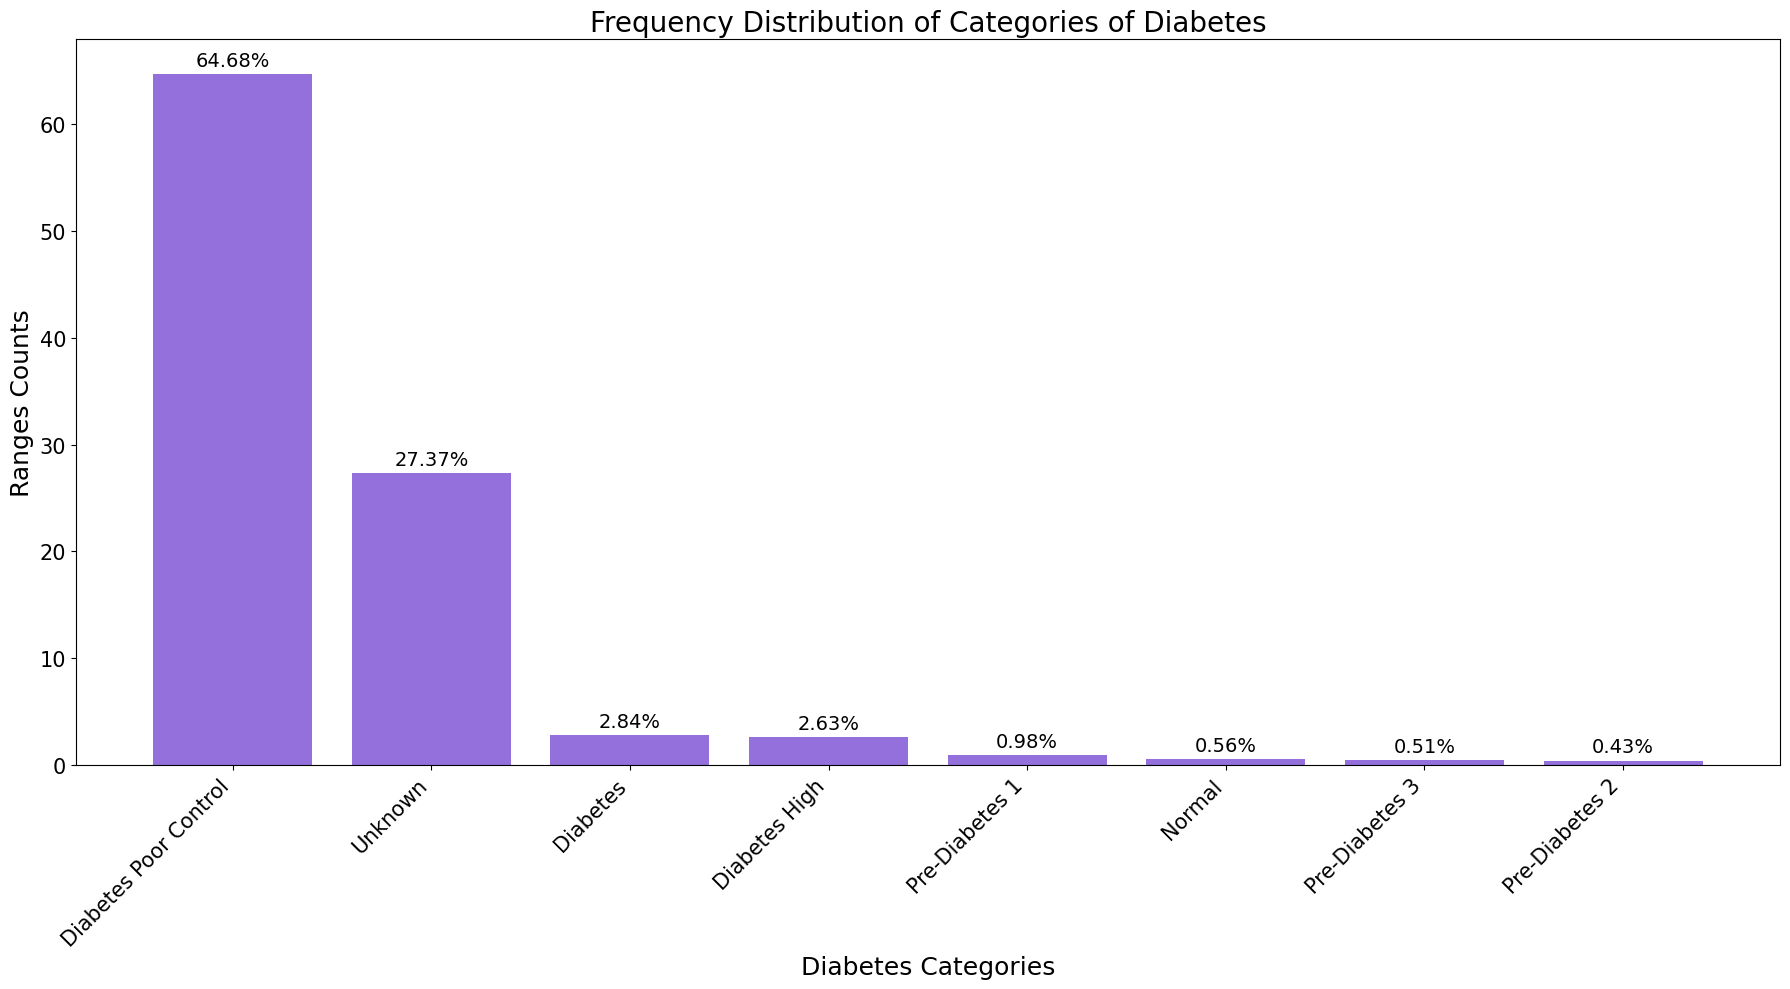

In [38]:
# Plot the frequency distribution as a bar chart
plt.figure(figsize=(18, 10))

bars = plt.bar(category_counts['Category'], category_counts['Percent_of_Frequency'], color='mediumpurple')


# # Add labels on top of each bar
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom', fontsize=14)
for bar in bars:
    yval = bar.get_height()
    plt.annotate(f'{yval:.2f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, yval),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=14)


# Plot the frequency distribution as a bar chart

plt.bar(category_counts['Category'], category_counts['Percent_of_Frequency'], color='mediumpurple')
plt.xlabel('Diabetes Categories', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.ylabel('Ranges Counts', fontsize=18)
plt.yticks(fontsize=15)
plt.title('Frequency Distribution of Categories of Diabetes', fontsize=20)
plt.tight_layout()
plt.show()


In [43]:
#Total data = 33025 
# 4(b).	For Patients with Hypertension and/or Diabetes (this will be your entire cohort), how many had lab values in the following ranges:
# i.	GFR Categories
# 1.	G1 Normal or High >=90
# 2.	G2 Mildly Decreased 60-89
# 3.	G3a Mildly-Moderately Decreased 45-59
# 4.	G3b Moderately to severely decreased 30-44
# 5.	G4 Severely decreased 15-29
# 6.	G5 Kidney Failure <15
# 7.	Unknown (This will be all the results that you will not be able to convert (“standardize”) to one of the categories above. 


#Seperating EGFR values
df_egfr = df[df['LOINC_CODE'] == '98979-8']

df_final_egfr = df_egfr[['mbi_id_orig','RESULT_VALUE_A']]

df_final_egfr.rename(columns={'RESULT_VALUE_A':'EGFR'}, inplace=True)

#Seperating UACR values
df_uacr = df[df['LOINC_CODE'] == '9318-7']

df_final_uacr = df_uacr[['mbi_id_orig','RESULT_VALUE_A']]

df_final_uacr.rename(columns={'RESULT_VALUE_A':'UACR'}, inplace=True)

df_final_merged = pd.merge(df_final_egfr, df_final_uacr, on='mbi_id_orig',how='left')


#Converting the EGFR and UACR columns into numeric datatype and dropping the null values
df_final_merged['EGFR'] = pd.to_numeric(df_final_merged['EGFR'], errors='coerce')
df_final_merged = df_final_merged.dropna(subset=['EGFR'])

df_final_merged['UACR'] = pd.to_numeric(df_final_merged['UACR'], errors='coerce')
df_final_merged = df_final_merged.dropna(subset=['UACR'])

df_final_merged['DM'] = df['DM']

df_final_merged['HTN'] = df['HTN']

#Putting condition where DM = 1 and HTN = 1
df_cohort = df_final_merged[(df_final_merged['DM'] == 1) | (df_final_merged['HTN'] == 1)]

# 2. Define the function to categorize EGFR values
def categorize_egfr(value):
    if value >= 90:
        return 'G1 Normal or High'
    elif 60 <= value <= 89:
        return 'G2 Mildly Decreased'
    elif 45 <= value <= 59:
        return 'G3a Mildly-Moderately Decreased'
    elif 30 <= value <= 44:
        return 'G3b Moderately to Severely Decreased'
    elif 15 <= value <= 29:
        return 'G4 Severely Decreased'
    elif value < 15:
        return 'G5 Kidney Failure'
    else:
        return 'Unknown'

# 3. Create a new column to categorize each EGFR value
df_cohort['EGFR_Category'] = df_cohort['EGFR'].apply(categorize_egfr)


# 4. Count the number of patients in each EGFR category
egfr_category_counts = df_cohort['EGFR_Category'].value_counts().reset_index()
egfr_category_counts.columns = ['EGFR_Category', 'Count']



# Calculate percentages
egfr_category_counts['Percent_of_Frequency'] = egfr_category_counts['Count'] / egfr_category_counts['Count'].sum() * 100

# Round the Percent_of_Frequency to 2 decimal places
egfr_category_counts['Percent_of_Frequency'] = egfr_category_counts['Percent_of_Frequency'].round(2)



egfr_category_counts

C:\Users\nsharma\AppData\Local\Temp\ipykernel_20820\416636086.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_egfr.rename(columns={'RESULT_VALUE_A':'EGFR'}, inplace=True)
C:\Users\nsharma\AppData\Local\Temp\ipykernel_20820\416636086.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_uacr.rename(columns={'RESULT_VALUE_A':'UACR'}, inplace=True)
C:\Users\nsharma\AppData\Local\Temp\ipykernel_20820\416636086.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,EGFR_Category,Count,Percent_of_Frequency
0,G2 Mildly Decreased,17821,53.96
1,G1 Normal or High,10870,32.91
2,G3a Mildly-Moderately Decreased,3058,9.26
3,G3b Moderately to Severely Decreased,791,2.40
4,G4 Severely Decreased,325,0.98
5,G5 Kidney Failure,160,0.48


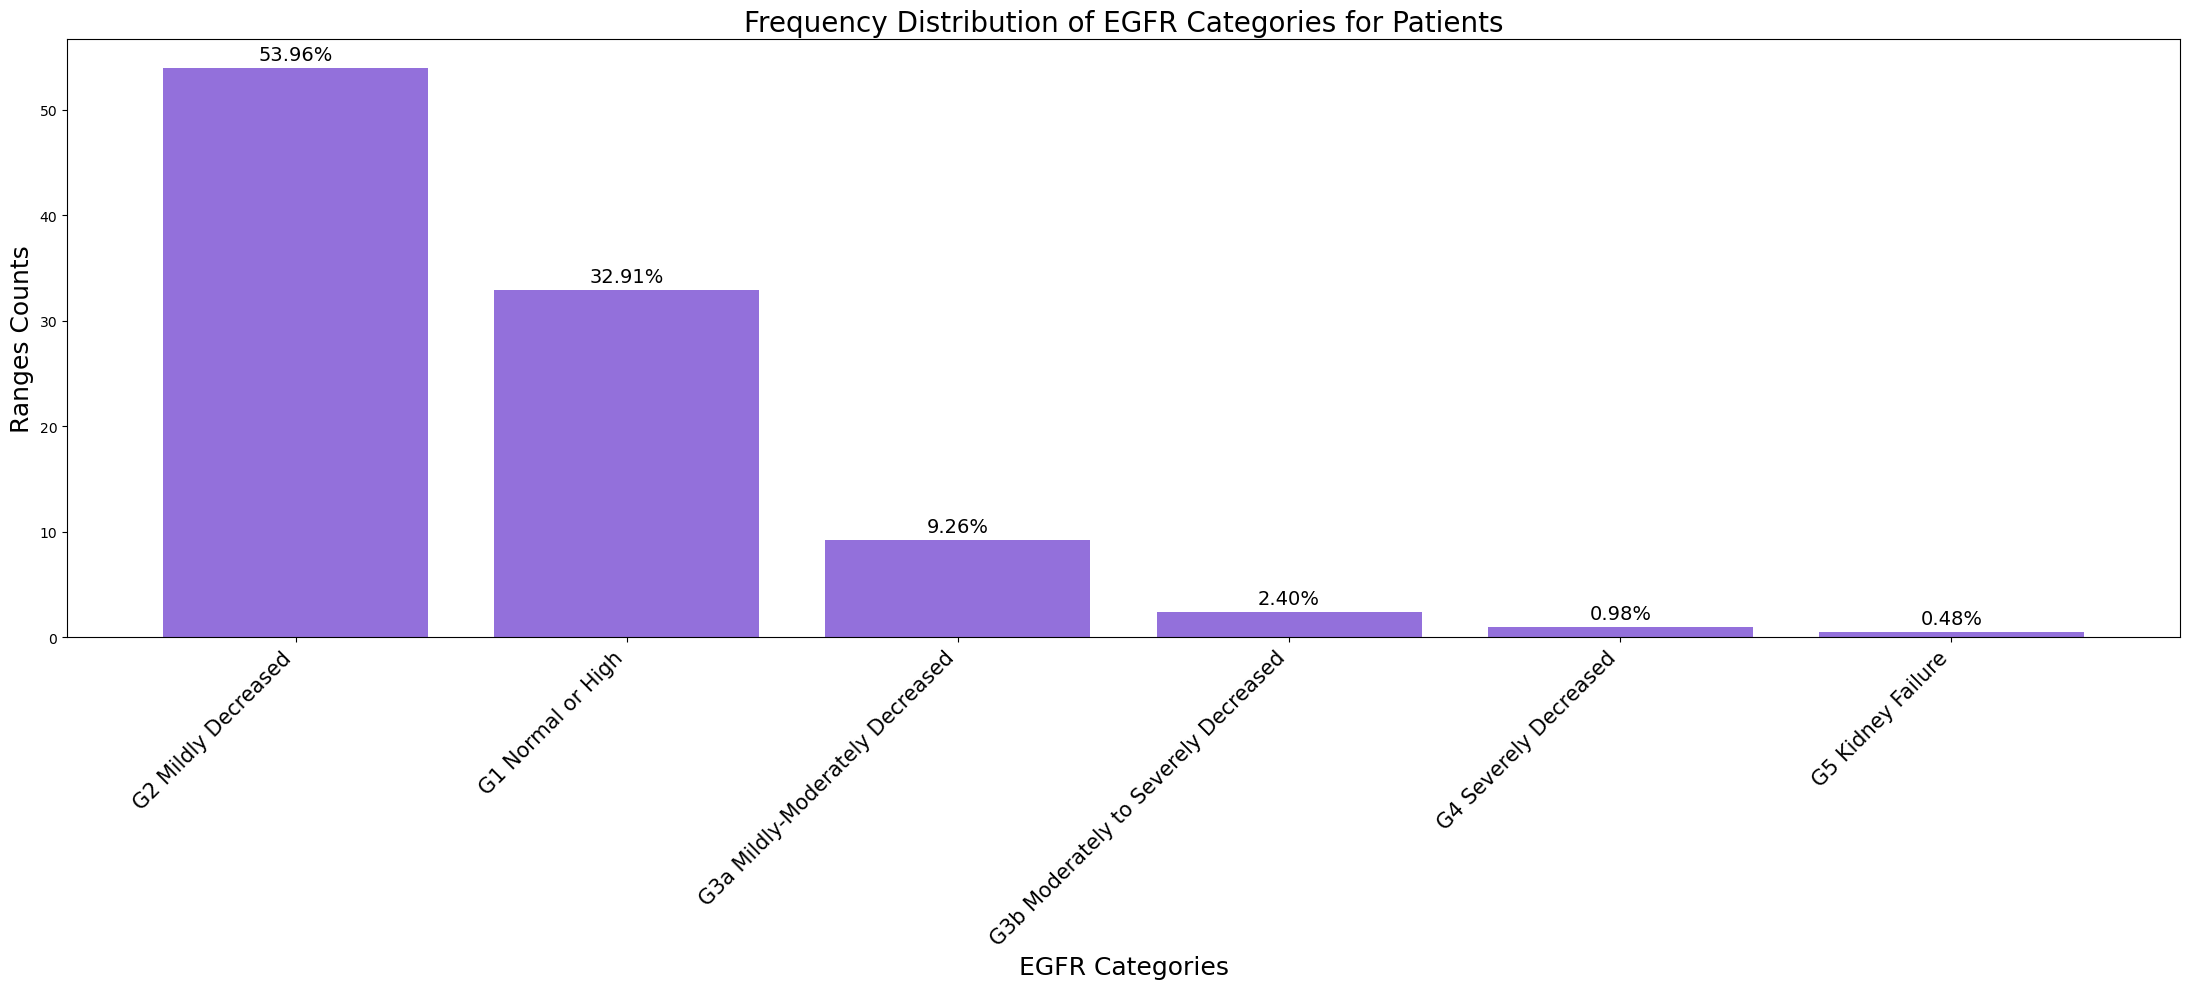

In [44]:

# Plot the frequency distribution as a bar chart
plt.figure(figsize=(22, 10))

bars = plt.bar(egfr_category_counts['EGFR_Category'], egfr_category_counts['Percent_of_Frequency'], color='mediumpurple')

for bar in bars:
    yval = bar.get_height()
    plt.annotate(f'{yval:.2f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, yval),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=14)

# Plot the frequency distribution as a bar chart

plt.bar(egfr_category_counts['EGFR_Category'], egfr_category_counts['Percent_of_Frequency'], color='mediumpurple')
plt.xlabel('EGFR Categories', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.ylabel('Ranges Counts', fontsize=18)
plt.yticks(fontsize=10)
plt.title('Frequency Distribution of EGFR Categories for Patients', fontsize=20)
plt.tight_layout()
plt.show()


In [47]:
#4(b)
# ii.	Albuminuria Categories
# 1.	A1 Normal to Mildly Increased <30 mg/g < 3 mg/mmol
# 2.	A2 Moderately Increased 30-299 mg/g 3-29 mg/mmol
# 3.	A3 Severely Increased ≥300 mg/g ≥30 mg/mmol
# 4.	Unknown (This will be all the results that you will not be able to convert (“standardize”) to one of the categories above. 


df_cohort = df_final_merged[(df_final_merged['DM'] == 1) | (df_final_merged['HTN'] == 1)]

# 2. Define the function to categorize UACR values
def categorize_uacr(value):
    if value < 30:
        return 'A1 Normal to Mildly Increased'
    elif 30 <= value <= 299:
        return 'A2 Moderately Increased'
    elif value >= 300:
        return 'A3 Severely Increased'
    else:
        return 'Unknown'

# 3. Create a new column to categorize each EGFR value
df_cohort['UACR_Category'] = df_cohort['UACR'].apply(categorize_uacr)


# 4. Count the number of patients in each EGFR category
uacr_category_counts = df_cohort['UACR_Category'].value_counts().reset_index()
uacr_category_counts.columns = ['UACR_Category', 'Count']


# Calculate percentages
uacr_category_counts['Percent_of_Frequency'] = uacr_category_counts['Count'] / uacr_category_counts['Count'].sum() * 100

# Round the Percent_of_Frequency to 2 decimal places
uacr_category_counts['Percent_of_Frequency'] = uacr_category_counts['Percent_of_Frequency'].round(2)


uacr_category_counts

C:\Users\nsharma\AppData\Local\Temp\ipykernel_20820\3662957012.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cohort['UACR_Category'] = df_cohort['UACR'].apply(categorize_uacr)


,UACR_Category,Count,Percent_of_Frequency
0,A1 Normal to Mildly Increased,23169,70.16
1,A2 Moderately Increased,8140,24.65
2,A3 Severely Increased,1716,5.20


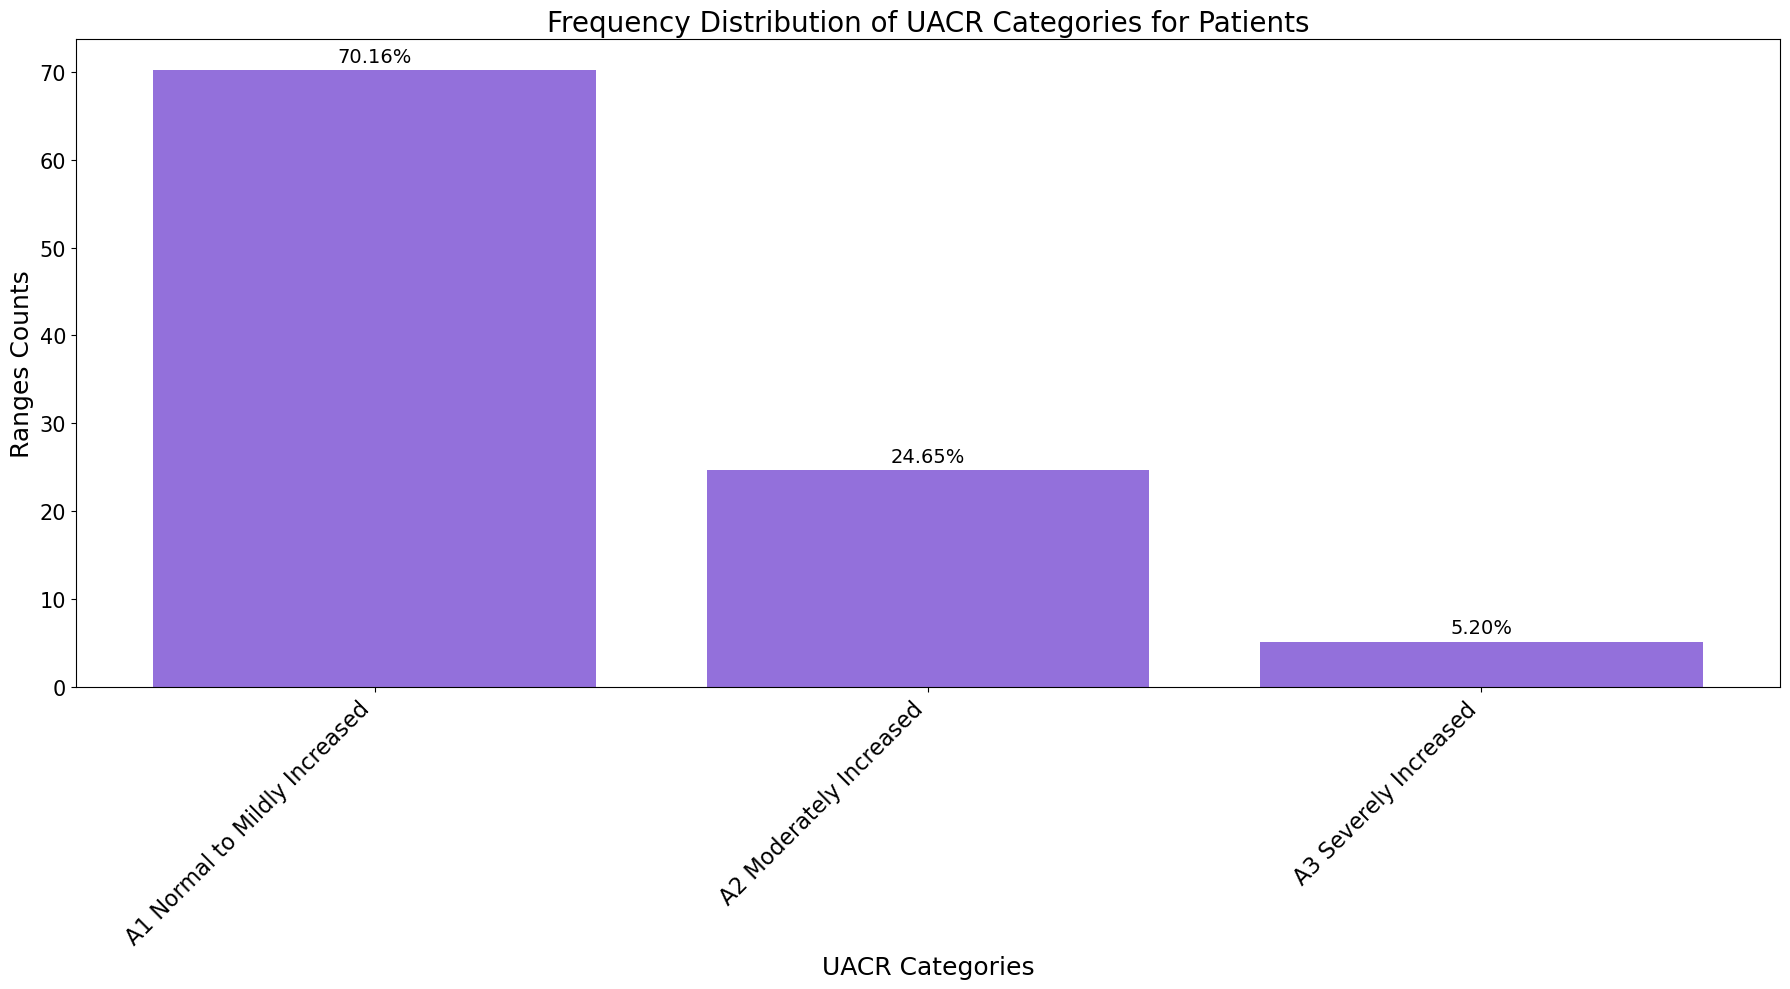

In [48]:
# Plot the frequency distribution as a bar chart
plt.figure(figsize=(18, 10))

bars = plt.bar(uacr_category_counts['UACR_Category'], uacr_category_counts['Percent_of_Frequency'], color='mediumpurple')

for bar in bars:
    yval = bar.get_height()
    plt.annotate(f'{yval:.2f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, yval),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=14)

# Plot the frequency distribution as a bar chart

plt.bar(uacr_category_counts['UACR_Category'], uacr_category_counts['Percent_of_Frequency'], color='mediumpurple')
plt.xlabel('UACR Categories', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.ylabel('Ranges Counts', fontsize=18)
plt.yticks(fontsize=15)
plt.title('Frequency Distribution of UACR Categories for Patients', fontsize=20)
plt.tight_layout()
plt.show()
